In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql import HiveContext

In [2]:
# Create a spark application
spark = SparkSession.builder \
.appName("ReadingFromHive") \
.master("local") \
.enableHiveSupport() \
.getOrCreate()

In [3]:
df = spark.sql("select * from boston_tbl where crim is not null")

In [4]:
df.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+----+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|  pt|     b|lstat|  mv|
+-------+----+-----+----+-----+-----+----+------+---+---+----+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+----+------+-----+----+
only showing top 5 rows



<Figure size 720x720 with 0 Axes>

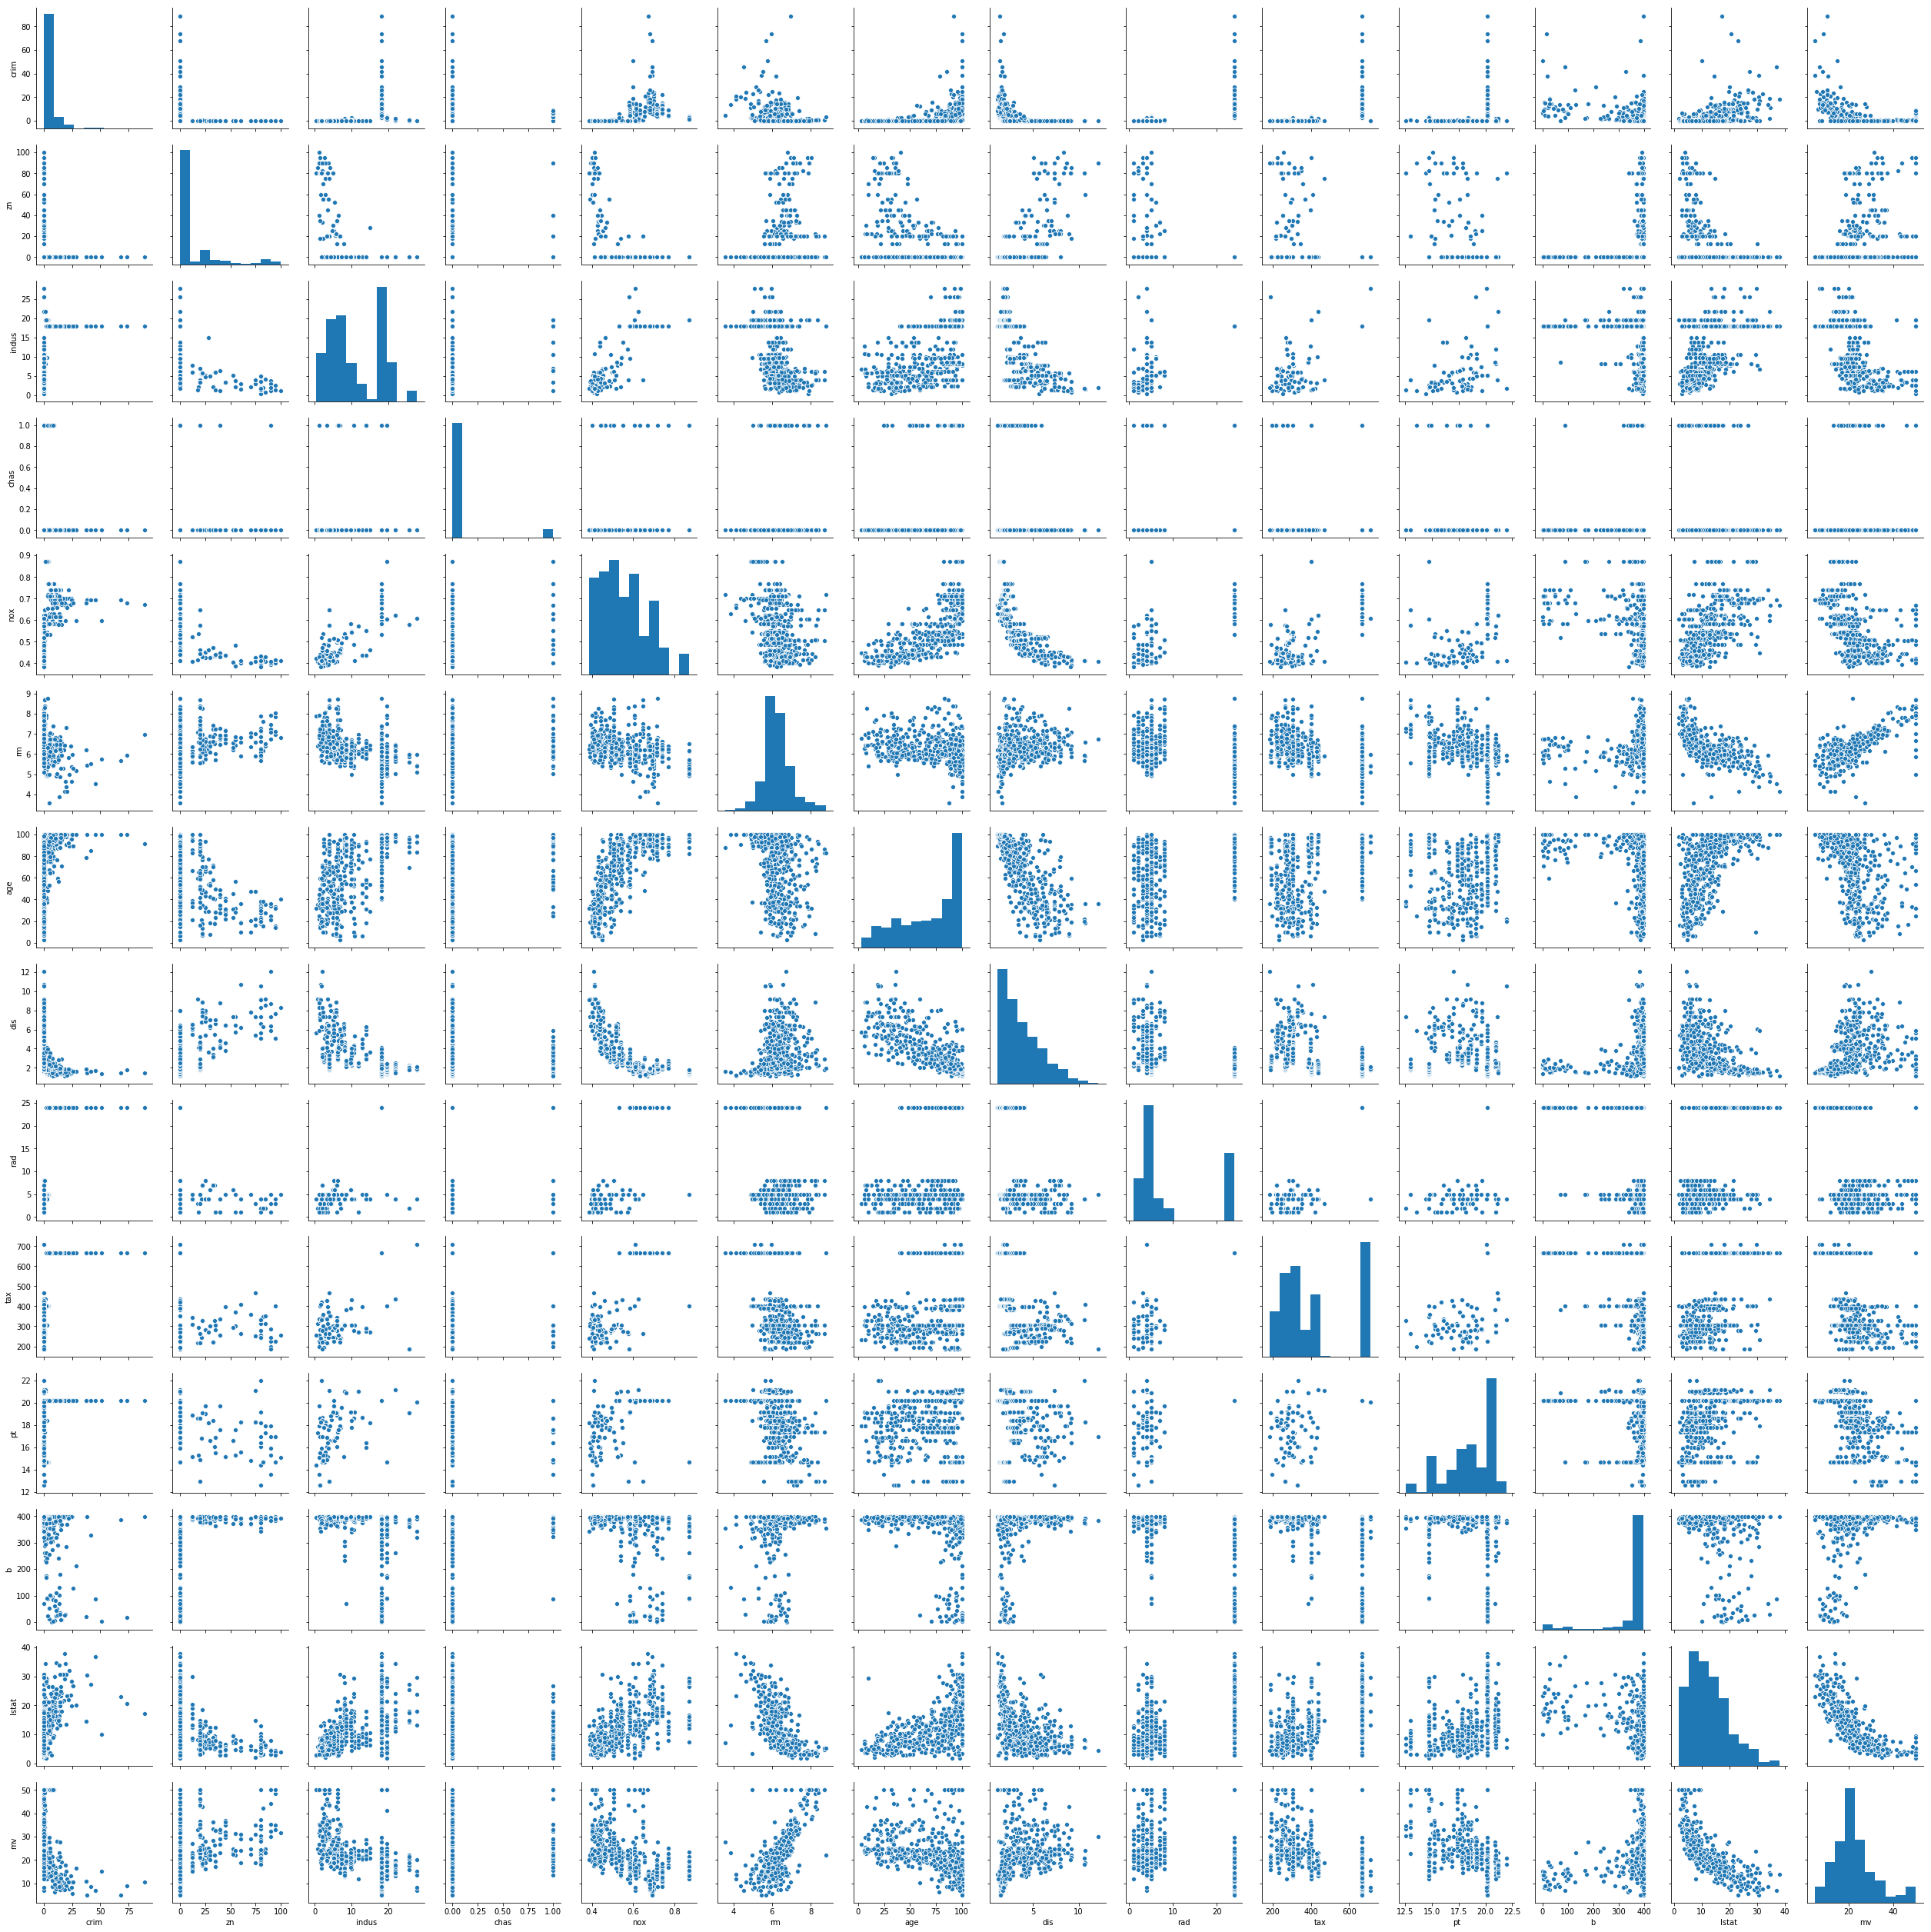

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt

df_pd = df.toPandas()
plt.figure(figsize=(10,10))
sns.pairplot(data=df_pd)
plt.show()

In [6]:
df_pd.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,pt,b,lstat,mv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [8]:
#validdate the size of data
print((df.count(), len(df.columns)))

(506, 14)


In [9]:
#explore the data
df.printSchema()

root
 |-- crim: float (nullable = true)
 |-- zn: float (nullable = true)
 |-- indus: float (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: float (nullable = true)
 |-- rm: float (nullable = true)
 |-- age: float (nullable = true)
 |-- dis: float (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- pt: float (nullable = true)
 |-- b: float (nullable = true)
 |-- lstat: float (nullable = true)
 |-- mv: float (nullable = true)



In [12]:
#import corr function from pyspark functions
from pyspark.sql.functions import corr

In [13]:
#import vectorassembler to create ddense vectors
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler

In [14]:
#select the columns to create input vector
df.columns

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'pt',
 'b',
 'lstat',
 'mv']

In [15]:
#create the vector assembler
vec_assembler=VectorAssembler(inputCols=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','pt','b','lstat'],outputCol='features')

In [16]:
#transform the values
features_df=vec_assembler.transform(df)

In [17]:
#validate the presence of dense vectors
features_df.printSchema()

root
 |-- crim: float (nullable = true)
 |-- zn: float (nullable = true)
 |-- indus: float (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: float (nullable = true)
 |-- rm: float (nullable = true)
 |-- age: float (nullable = true)
 |-- dis: float (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- pt: float (nullable = true)
 |-- b: float (nullable = true)
 |-- lstat: float (nullable = true)
 |-- mv: float (nullable = true)
 |-- features: vector (nullable = true)



In [18]:
#view the details of dense vector
features_df.select('crim','zn','indus','chas','nox','rm','age','dis','rad','tax','pt','b','lstat','features').show(5,False)

+-------+----+-----+----+-----+-----+----+------+---+---+----+------+-----+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|crim   |zn  |indus|chas|nox  |rm   |age |dis   |rad|tax|pt  |b     |lstat|features                                                                                                                                                                                   |
+-------+----+-----+----+-----+-----+----+------+---+---+----+------+-----+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|0.00632|18.0|2.31 |0   |0.538|6.575|65.2|4.09  |1  |296|15.3|396.9 |4.98 |[0.006320000160485506,18.0,2.309999942779541,0.0,0.5379999876022339,6.574999809265137,65.19999694824219,4.090000152587891,1.0,296.0,1

In [21]:
#create data containing input feature and output column
model_df=features_df.select('features','mv')

In [23]:
#size of model df
print((model_df.count(), len(model_df.columns)))

(506, 2)


In [24]:
#Split Data - Train & Test set

In [26]:
#split the data into 70/30 ratio for train test 
train_df,test_df=model_df.randomSplit([0.7,0.3])

In [27]:
print((train_df.count(), len(train_df.columns)))

(349, 2)


In [28]:
print((test_df.count(), len(test_df.columns)))

(157, 2)


In [29]:
train_df.describe().show()

+-------+------------------+
|summary|                mv|
+-------+------------------+
|  count|               349|
|   mean|22.696848150652254|
| stddev| 9.479992043123053|
|    min|               5.0|
|    max|              50.0|
+-------+------------------+



In [32]:
#import linear regression from spark's MLLib
from pyspark.ml.regression import LinearRegression

In [33]:
#Build Linear Regression model
lin_Reg=LinearRegression(labelCol='mv')

In [34]:
# fit the linear regression model on training dataset
lr_model = lin_Reg.fit(train_df)

In [35]:
lr_model.intercept

30.372138270292293

In [36]:
#print DenseVector
print(lr_model.coefficients)

[-0.08772717794664991,0.0641212747653331,0.08738690472798846,2.6591298157690755,-13.087294047269381,3.879863336647974,0.0017715320830226139,-1.5422841281941573,0.2789690920963989,-0.013704542648572498,-0.7650994403293305,0.012000945460026486,-0.6301451905977066]


In [37]:
training_predictions=lr_model.evaluate(train_df)

In [38]:
training_predictions.meanSquaredError

20.782917721408303

In [39]:
training_predictions.r2

0.7680807725656399

In [40]:
test_results=lr_model.evaluate(test_df)

In [41]:
#view the residual error based on preditions
test_results.residuals.show(10)

+-------------------+
|          residuals|
+-------------------+
|  3.351492945630696|
|  5.473356242467759|
| -2.947524071652815|
|  10.09639832036935|
| 0.2723586557388096|
|-0.6374740192999653|
| -4.328749965627367|
|  3.728478049226922|
|-1.7392765927027227|
| -5.235947892863756|
+-------------------+
only showing top 10 rows



In [42]:
test_results.r2

0.6397787466684051

In [43]:
test_results.rootMeanSquaredError

5.116819927509332

In [44]:
test_results.meanSquaredError

26.181846170556607